<a href="https://colab.research.google.com/github/LeHoangNhuan/ROBOT_H-N/blob/main/Robotic_welding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
pip install scikit-fuzzy

In [175]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
doday= ctrl.Antecedent(np.arange(0, 30.1, 1), 'doday')
kichthuockheho= ctrl.Antecedent(np.arange(0,10.1,0.1),'kichthuockheho')
donghan= ctrl.Consequent(np.arange(50, 250.1, 1),'donghan')
tocdohan= ctrl.Consequent(np.arange(0, 20.1, 1), 'tocdohan')

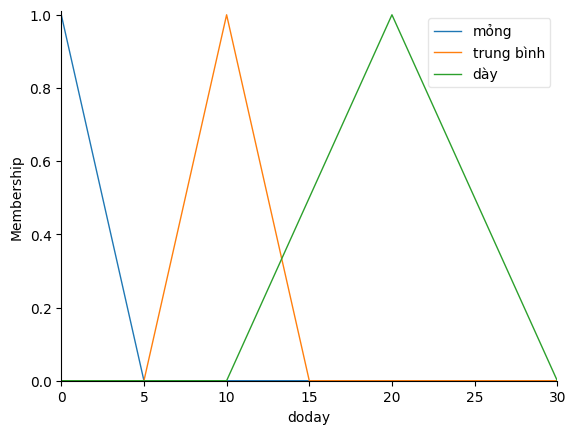

In [176]:
doday['mỏng']=fuzz.trimf(doday.universe,[0,0,5])
doday['trung bình']=fuzz.trimf(doday.universe,[5,10,15])
doday['dày']=fuzz.trimf(doday.universe,[10,20,30])
doday.view()

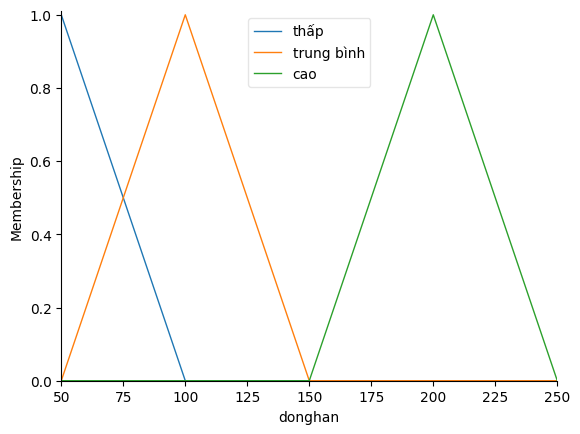

In [177]:
donghan['thấp']=fuzz.trimf(donghan.universe,[0,50,100])
donghan['trung bình']=fuzz.trimf(donghan.universe,[50,100,150])
donghan['cao']=fuzz.trimf(donghan.universe,[150,200,250])
donghan.view()

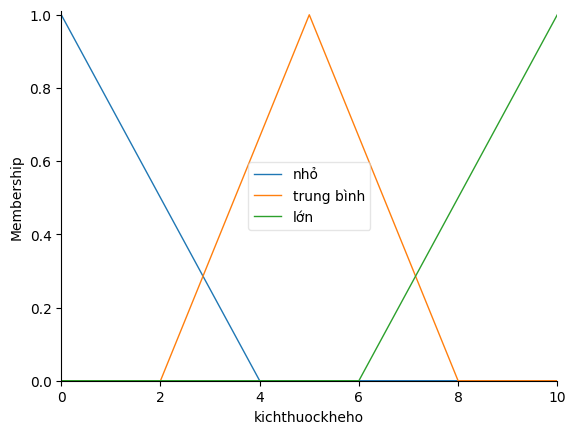

In [178]:
kichthuockheho['nhỏ']=fuzz.trimf(kichthuockheho.universe,[0,0,4])
kichthuockheho['trung bình']=fuzz.trimf(kichthuockheho.universe,[2,5,8])
kichthuockheho['lớn']=fuzz.trimf(kichthuockheho.universe,[6,10,10])
kichthuockheho.view()

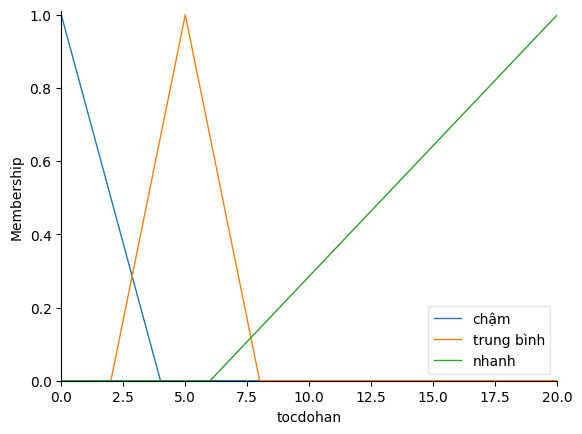

In [179]:
tocdohan['chậm']=fuzz.trimf(tocdohan.universe,[0,0,4])
tocdohan['trung bình']=fuzz.trimf(tocdohan.universe,[2,5,8])
tocdohan['nhanh']=fuzz.trimf(tocdohan.universe,[6,20,20])
tocdohan.view()

In [180]:
#Khai báo các luật fuzzy
rule1 = ctrl.Rule(doday['mỏng'] & kichthuockheho['nhỏ'], (donghan['thấp'], tocdohan['nhanh']))
rule2 = ctrl.Rule(doday['mỏng'] & kichthuockheho['trung bình'], (donghan['trung bình'], tocdohan['nhanh']))
rule3 = ctrl.Rule(doday['mỏng'] & kichthuockheho['lớn'], (donghan['trung bình'], tocdohan['trung bình']))

rule4 = ctrl.Rule(doday['trung bình'] & kichthuockheho['nhỏ'], (donghan['trung bình'], tocdohan['nhanh']))
rule5 = ctrl.Rule(doday['trung bình'] & kichthuockheho['trung bình'], (donghan['trung bình'], tocdohan['trung bình']))
rule6 = ctrl.Rule(doday['trung bình'] & kichthuockheho['lớn'], (donghan['cao'], tocdohan['chậm']))

rule7 = ctrl.Rule(doday['dày'] & kichthuockheho['nhỏ'], (donghan['trung bình'], tocdohan['chậm']))
rule8 = ctrl.Rule(doday['dày'] & kichthuockheho['trung bình'], (donghan['cao'], tocdohan['chậm']))
rule9 = ctrl.Rule(doday['dày'] & kichthuockheho['lớn'], (donghan['cao'], tocdohan['chậm']))

 Dòng hàn dự kiến: 200.0
Tốc độ hàn dự kiến: 1.56


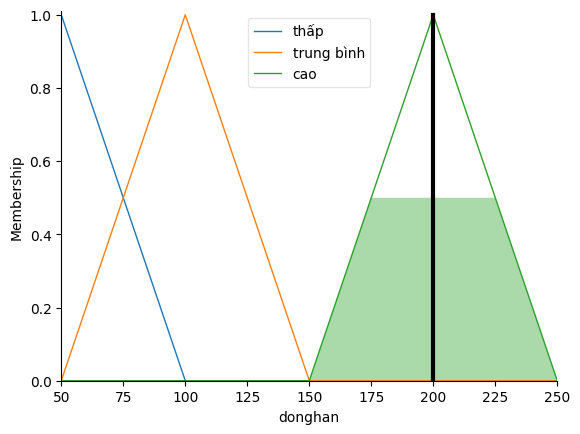

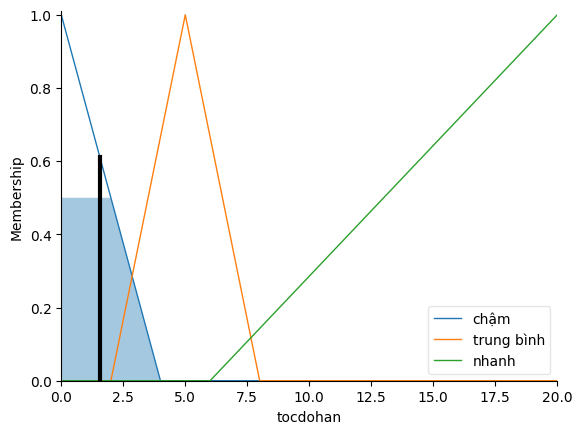

In [181]:
# Tạo hệ thống điều khiển
he_thong = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ket_qua = ctrl.ControlSystemSimulation(he_thong)
# Nhập giá trị đầu vào
ket_qua.input['doday'] = 25  # ví dụ: độ dày trung bình dày
ket_qua.input['kichthuockheho'] = 5  # ví dụ: khe hở lớn
# Tính toán kết quả
ket_qua.compute()
# In kết quả đầu ra
print(" Dòng hàn dự kiến:", round(ket_qua.output['donghan'], 2))
print("Tốc độ hàn dự kiến:", round(ket_qua.output['tocdohan'], 2))
# Vẽ biểu đồ
donghan.view(sim=ket_qua)
tocdohan.view(sim=ket_qua)